# Analyze Ball on Incline data
Use this notebook to quickly test whether your ball on incline data makes sense!

In [203]:
# Imports
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import math
from iminuit import Minuit


## Reading the data

The function "read_csv(filename)" takes in a filename and returns numpy arrays with time and voltage.

In [204]:
def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=13, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    return time, voltage

def find_midpoints(time, voltage, show_plot=True):
    """Find timing of ball crossings"""
    # Write a function yourself, which identifies the peaks in the voltage,
    # and returns values for passing times and (possibly) their uncertainties
    # in it (but they are generally very small!).
    t_pass = []
    t_pass_sigma = [0.0001, 0.00001]
    t_end = []
    for i in range(len(time)):
        if voltage[i]>3.5 and voltage[i]-voltage[i-1]>0.25:
            t_pass.append(time[i])

    for i in range(len(time)):
        if voltage[i]-voltage[i-1]<0.25 and voltage[i]>3.5 and voltage[i+1]<3.5:
            t_end.append(time[i])

    return t_pass, t_end, t_pass_sigma

for ball 1try 1[0.7789999999999999, 0.7791999999999999, 0.7794000000000001, 1.0266, 1.0268, 1.027, 1.2, 1.2002, 1.334, 1.3342, 1.3344, 1.4578, 1.458, 1.4582]
for ball 1try 2[0.1528, 0.153, 0.1532, 0.395, 0.3952, 0.3954, 0.5676000000000001, 0.5678000000000001, 0.7043999999999999, 0.7045999999999999, 0.8271999999999999, 0.8273999999999999, 0.8275999999999999]
for ball 1try 3[-0.1305999999999998, -0.1303999999999998, -0.1301999999999999, 0.1172, 0.1173999999999999, 0.1175999999999999, 0.2918000000000001, 0.292, 0.4279999999999999, 0.4281999999999999, 0.4283999999999999, 0.5508, 0.5509999999999999, 0.5511999999999999]
for ball 2try 1[-0.3241999999999998, -0.3239999999999998, -0.3237999999999999, -0.09419999999999984, -0.09399999999999986, -0.09379999999999988, 0.0656000000000001, 0.06580000000000008, 0.1919999999999999, 0.1921999999999999, 0.1923999999999999, 0.3066, 0.3068, 0.3069999999999999]
for ball 2try 2[-0.1796000000000002, -0.1793999999999998, -0.1791999999999998, 0.049400000000000

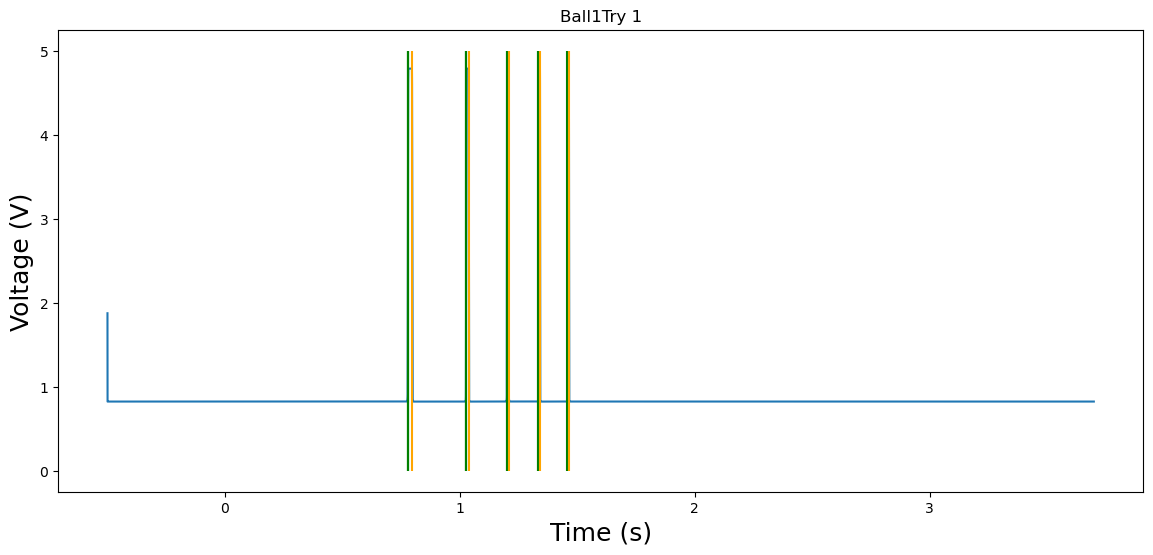

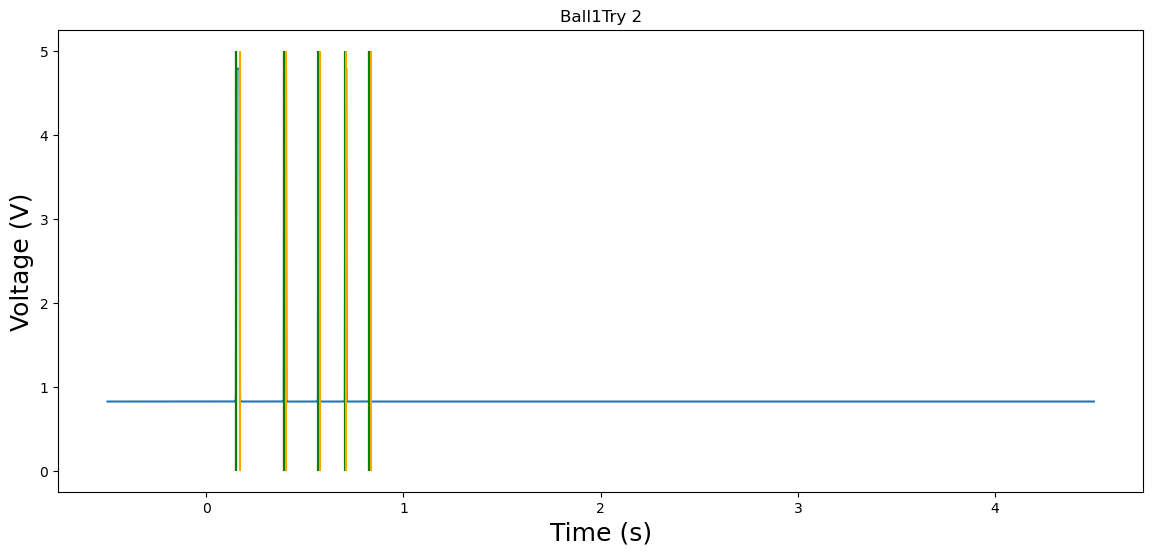

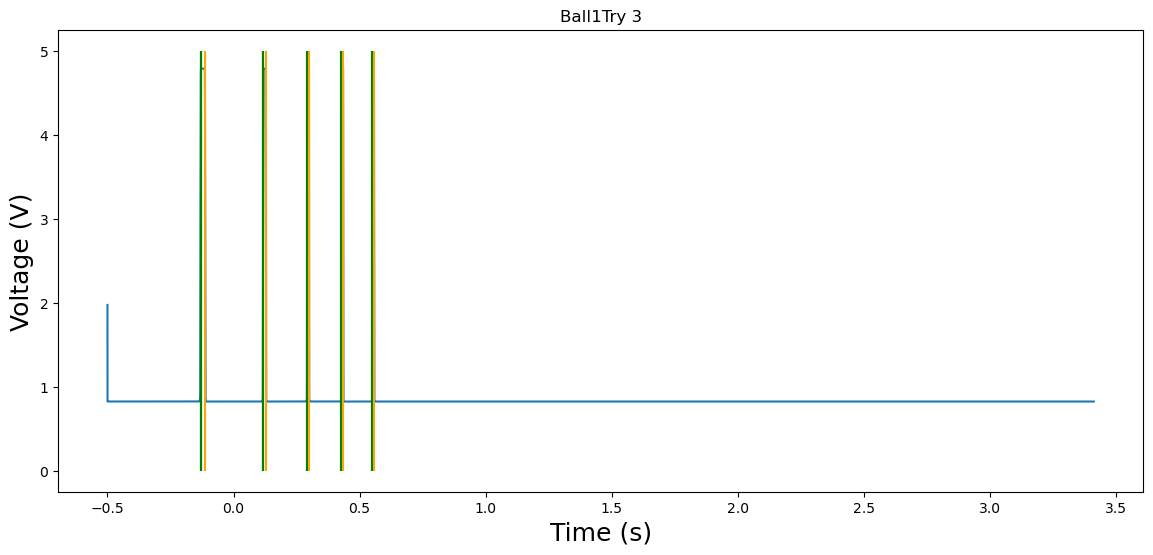

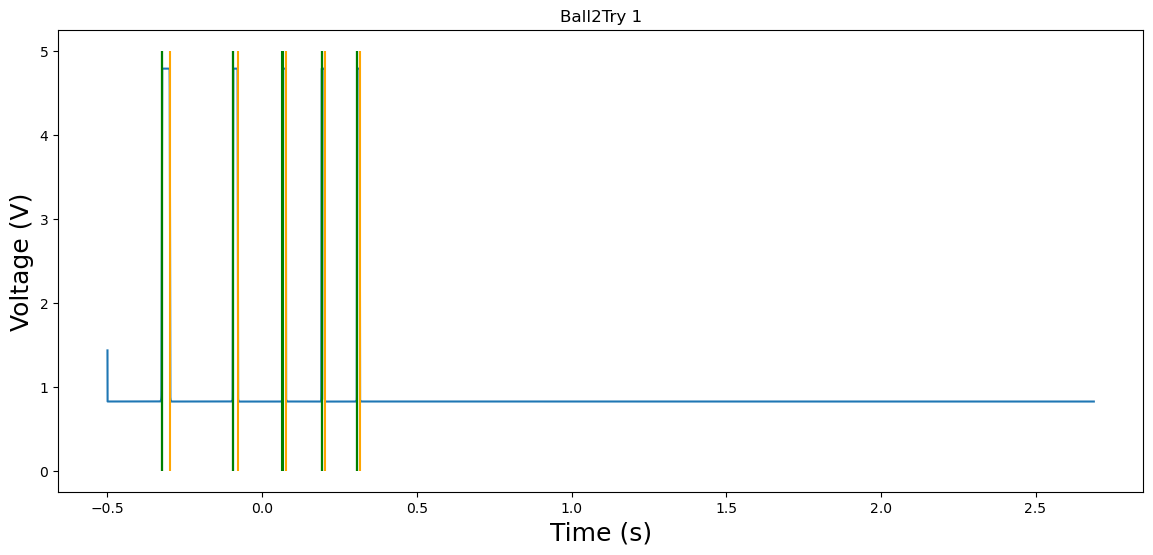

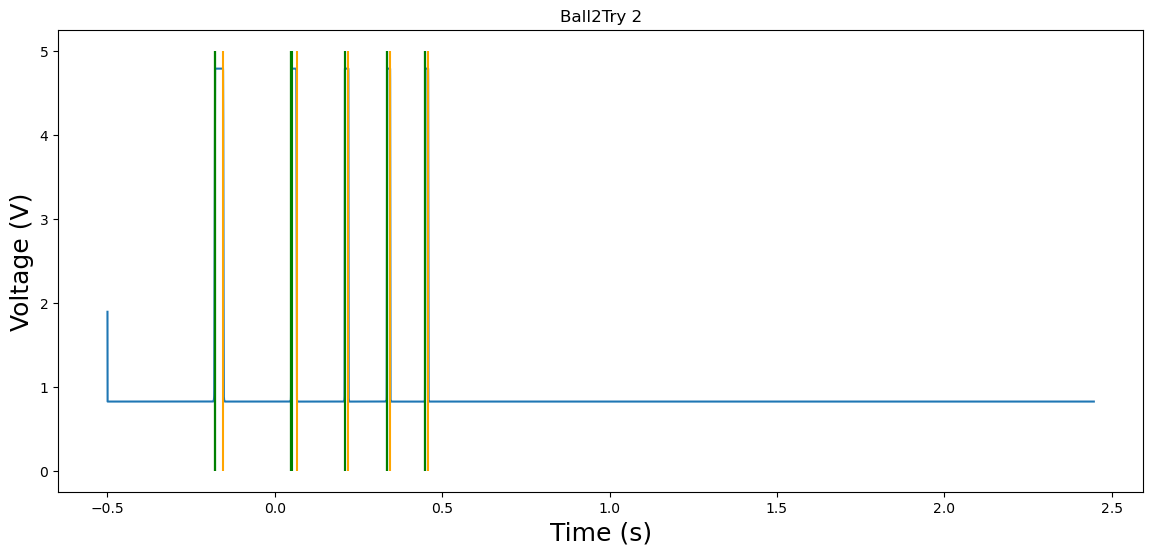

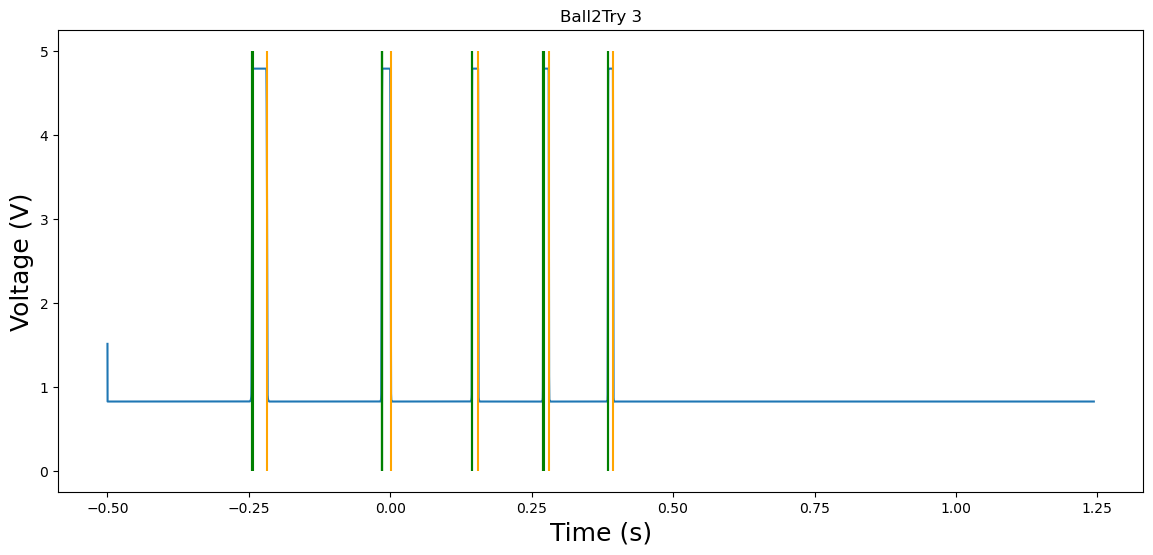

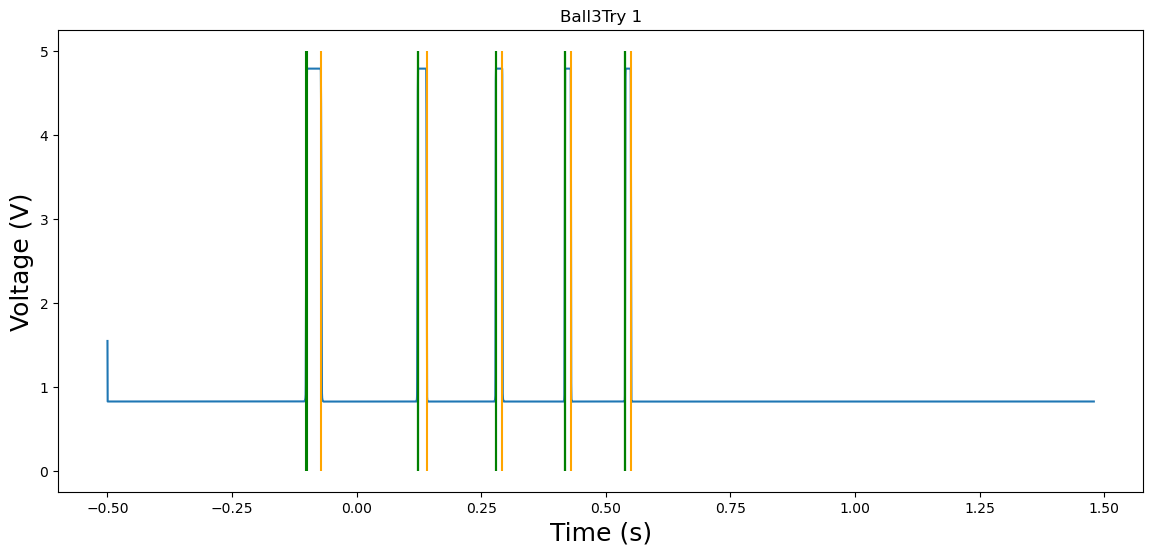

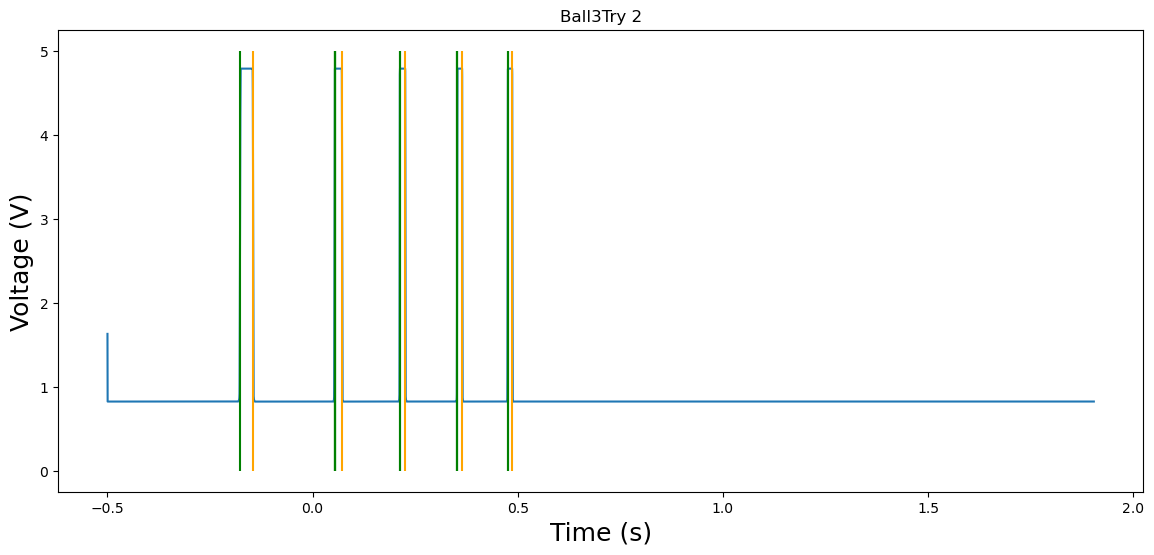

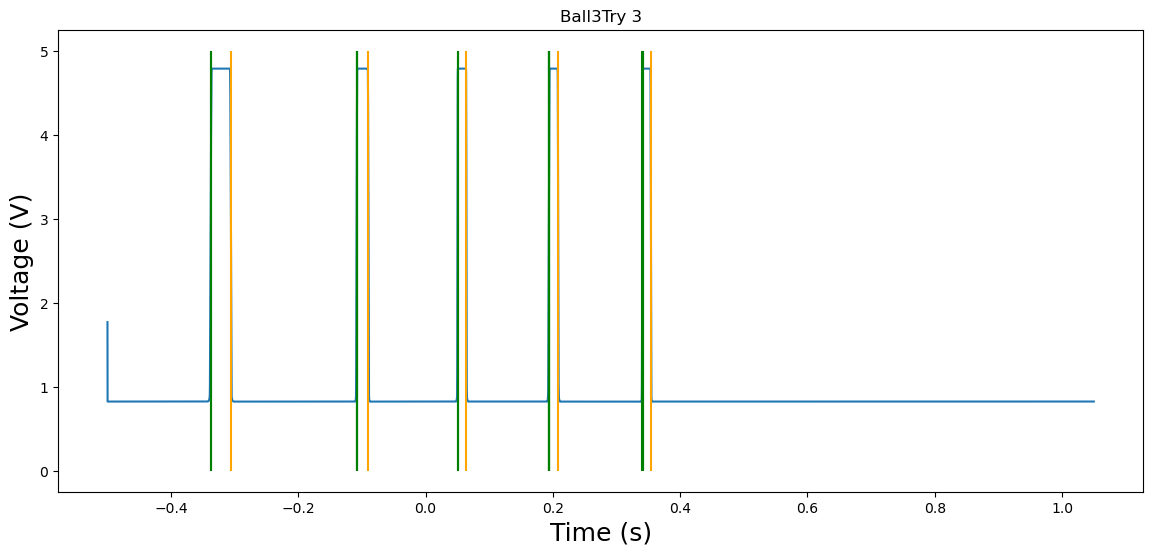

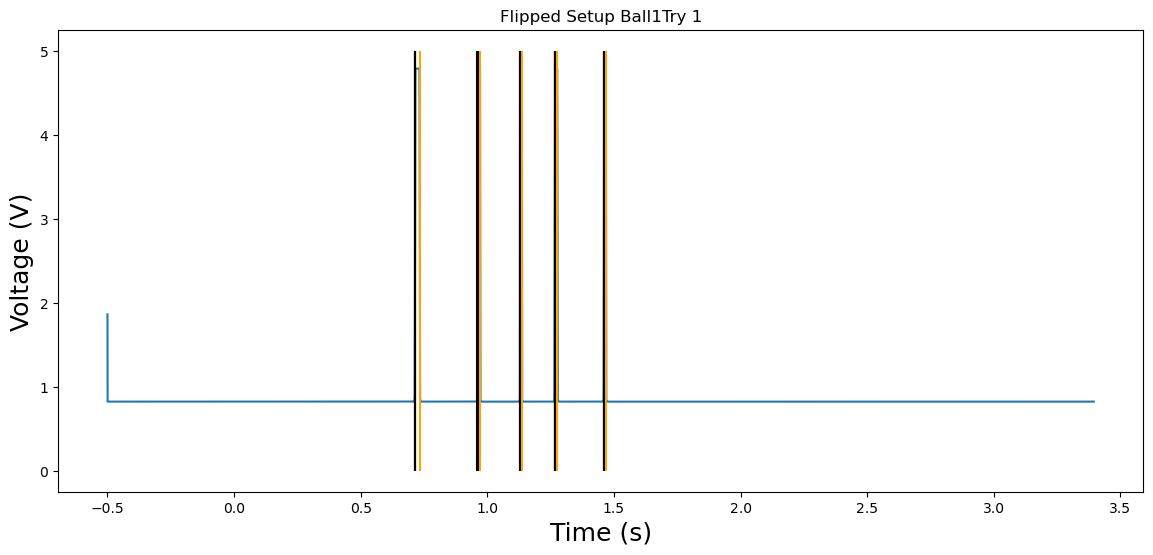

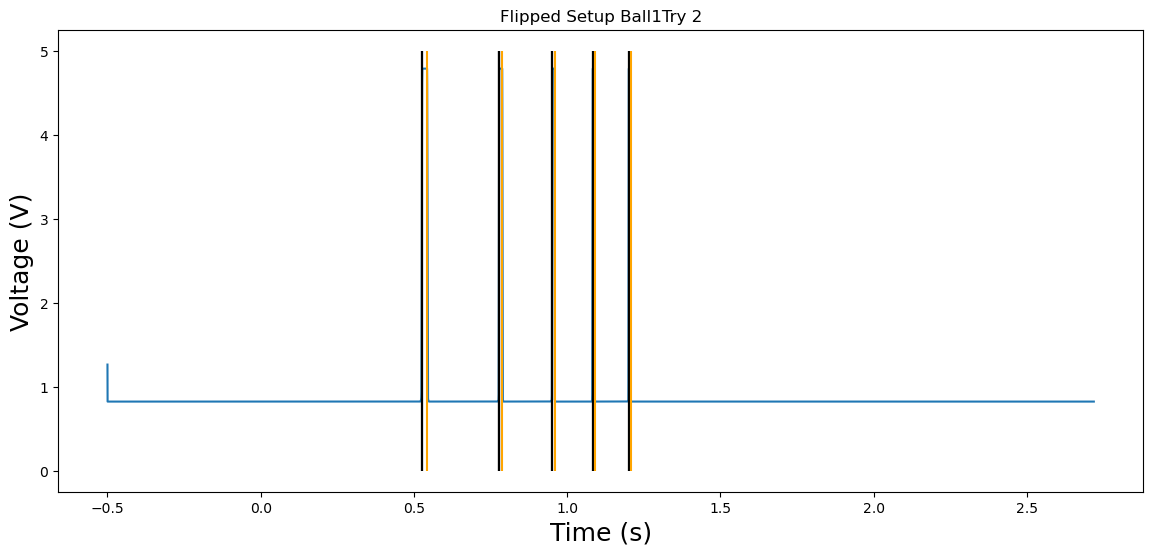

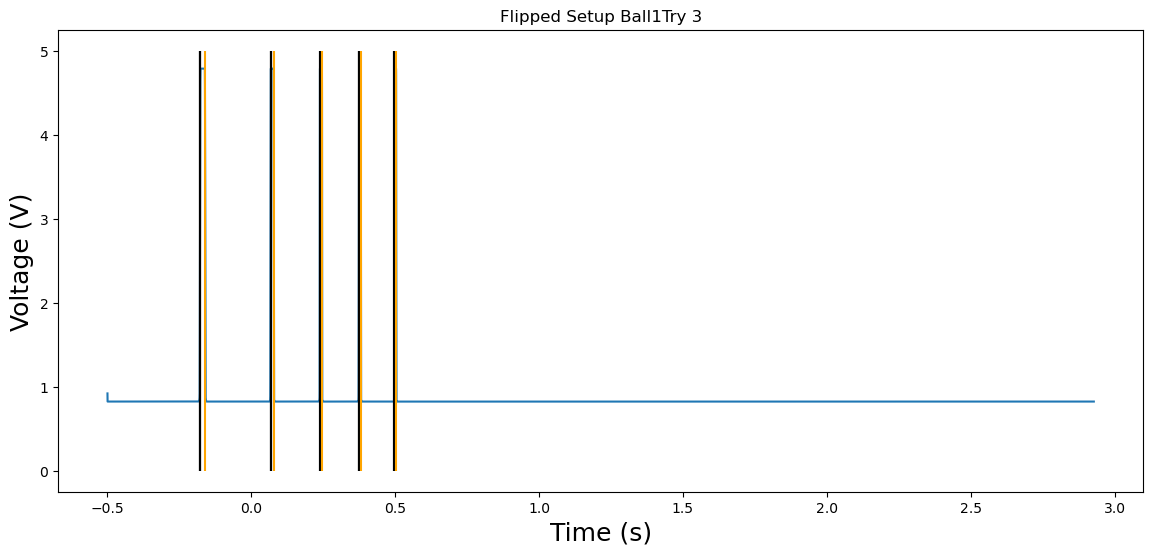

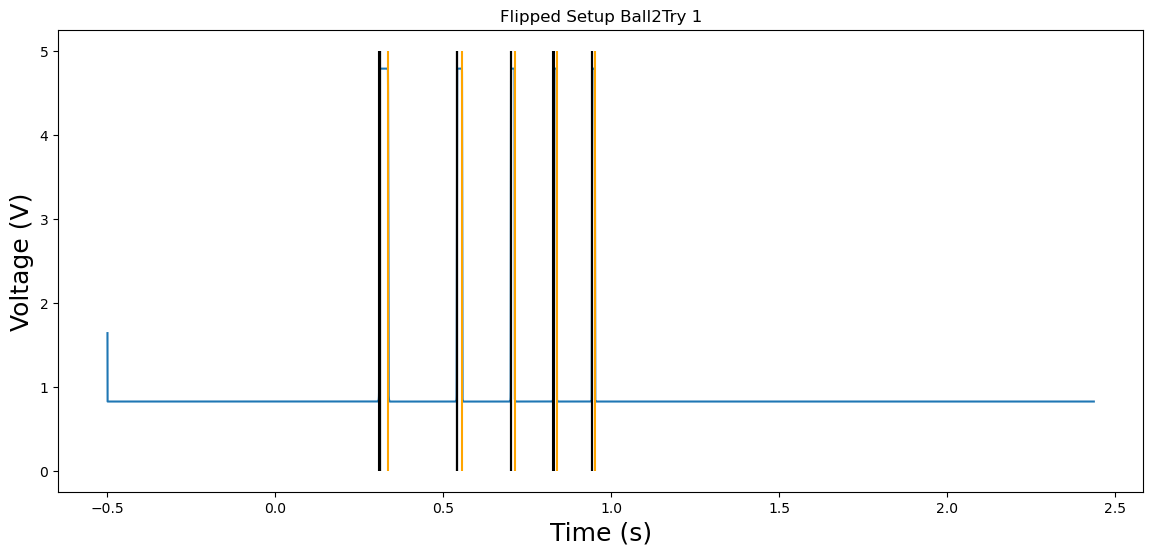

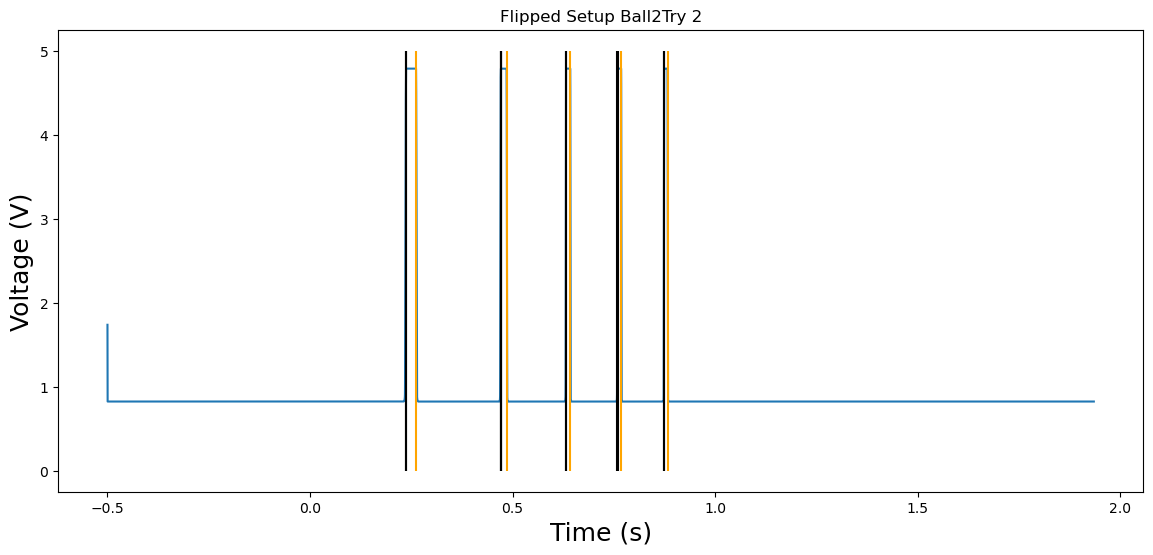

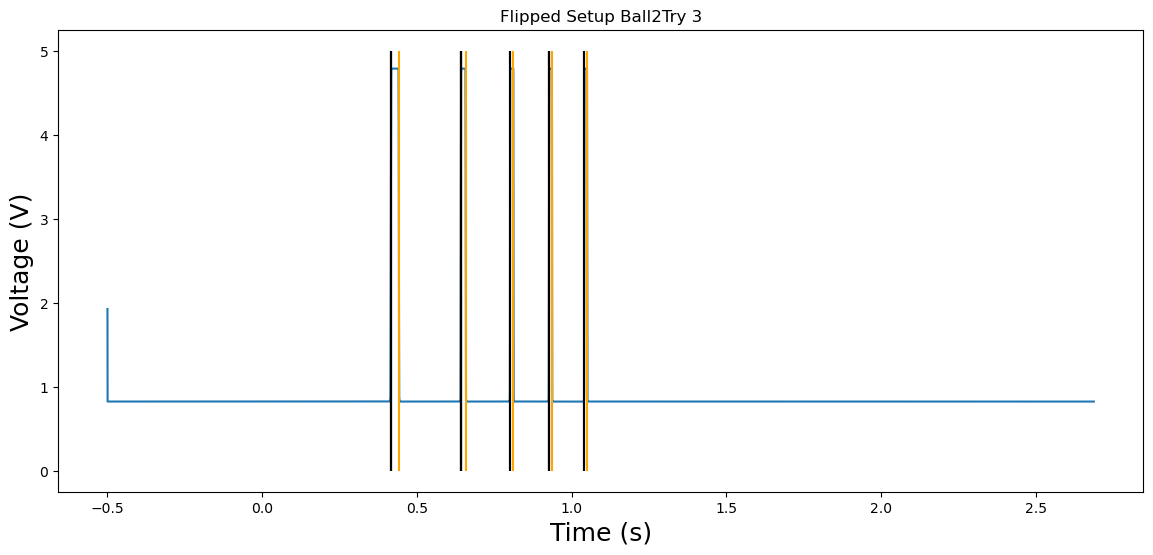

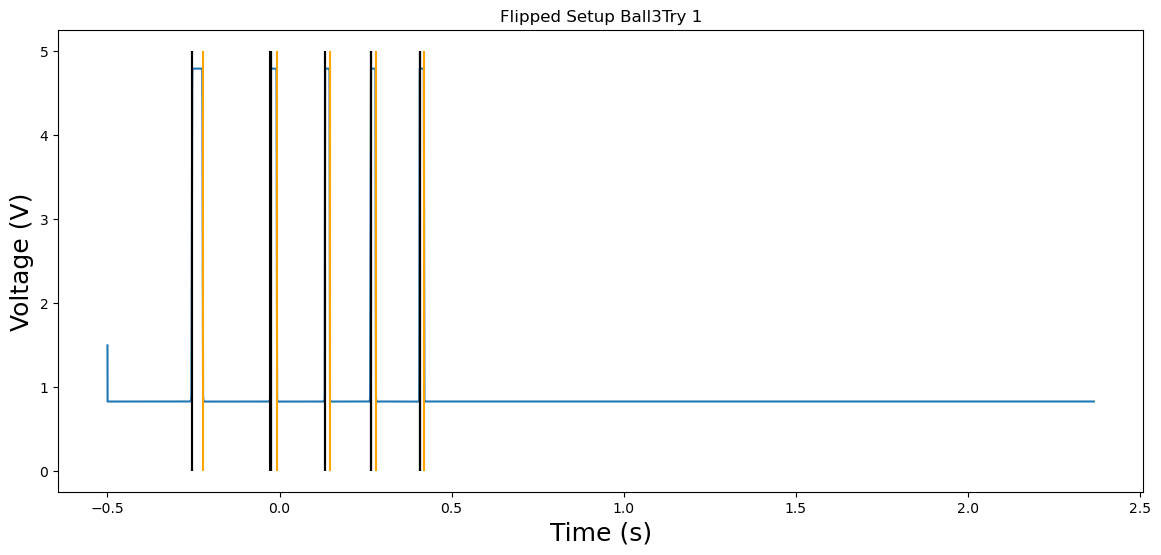

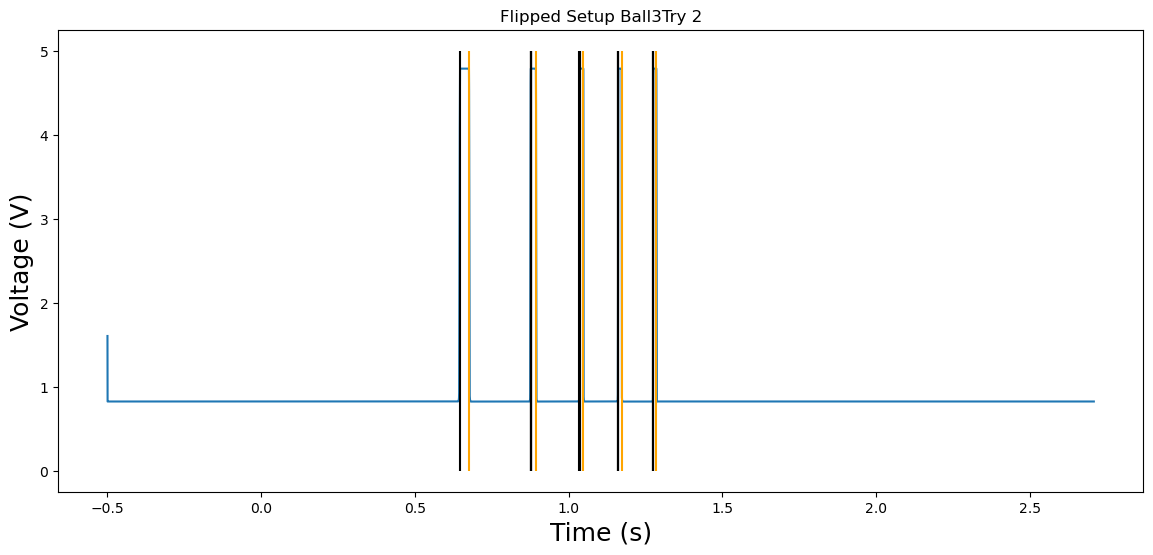

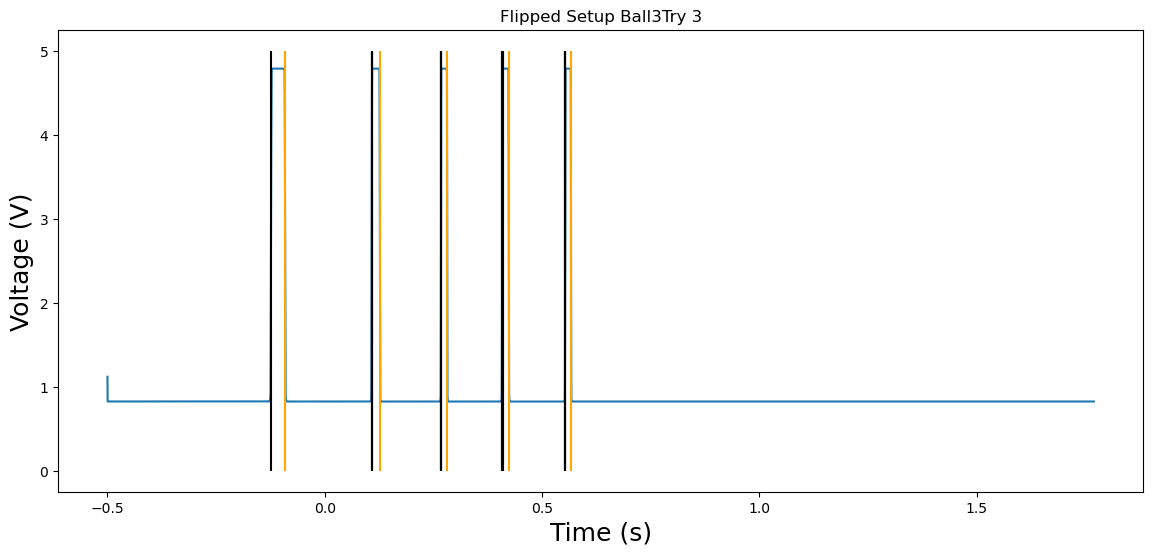

In [193]:
# Read the data and plot it (possibly with passing times in):
ball1_try1 = 'data/ball1_try1.csv'
ball1_try2 = 'data/ball1_try2.csv'
ball1_try3 = 'data/ball1_try3.csv'

ball2_try1 = 'data/ball2_try1.csv'
ball2_try2 = 'data/ball2_try2.csv'
ball2_try3 = 'data/ball2_try3.csv'

ball3_try1 = 'data/ball3_try1.csv'
ball3_try2 = 'data/ball3_try2.csv'
ball3_try3 = 'data/ball3_try3.csv'

flip_ball1_try1 = 'data/ball1_try1_flipped.csv'
flip_ball1_try2 = 'data/ball1_try2_flipped.csv'
flip_ball1_try3 = 'data/ball1_try3_flipped.csv'

flip_ball2_try1 = 'data/ball2_try1_flipped.csv'
flip_ball2_try2 = 'data/ball2_try2_flipped.csv'
flip_ball2_try3 = 'data/ball2_try3_flipped.csv'

flip_ball3_try1 = 'data/ball3_try1_flipped.csv'
flip_ball3_try2 = 'data/ball3_try2_flipped.csv'
flip_ball3_try3 = 'data/ball3_try3_flipped.csv'

times_ball1_try1 = []
times_ball1_try2 = []
times_ball1_try3 = []

times_ball2_try1 = []
times_ball2_try2 = []
times_ball2_try3 = []

times_ball3_try1 = []
times_ball3_try2 = []
times_ball3_try3 = []

times_ball1_end1 = []
times_ball1_end2 = []
times_ball1_end3 = []

times_ball2_end1 = []
times_ball2_end2 = []
times_ball2_end3 = []

times_ball3_end1 = []
times_ball3_end2 = []
times_ball3_end3 = []


for i in [1,2,3]:
    for j in [1,2,3]:
        time, voltage = read_csv('data/ball' + str(i) + '_try' + str(j) + '.csv')
        timepass, timeend, timepass_sig = find_midpoints(time, voltage)
        #'balltry' + str(i)+str(j) == timepass
        fig, ax = plt.subplots(figsize=(14, 6))
        ax.plot(time, voltage, label='Measurements')
        ax.vlines(x = timepass, ymin = 0, ymax = 5, color = "green")
        ax.vlines(x = timeend, ymin = 0, ymax = 5, color = "orange")
        ax.set_title("Ball" + str(i) + "Try " + str(j))
        ax.set_xlabel("Time (s)", fontsize=18)
        ax.set_ylabel("Voltage (V)", fontsize=18)
        print("for ball " + str(i) + "try " + str(j) +  str(timepass))
        if i == 1 and j ==1:
            times_ball1_try1 = timepass
            times_ball1_end1 = timeend
        if i == 1 and j ==2:
            times_ball1_try2 = timepass
            times_ball1_end2 = timeend
        if i == 1 and j ==3:
            times_ball1_try3 = timepass
            times_ball1_end3 = timeend

        if i == 2 and j ==1:
            times_ball2_try1 = timepass
            times_ball2_end1 = timeend
        if i == 2 and j ==2:
            times_ball2_try2 = timepass
            times_ball2_end2 = timeend
        if i == 2 and j ==3:
            times_ball2_try3 = timepass
            times_ball2_end3 = timeend

        if i == 3 and j ==1:
            times_ball3_try1 = timepass
            times_ball3_end1 = timeend
        if i == 3 and j ==2:
            times_ball3_try2 = timepass
            times_ball3_end2 = timeend
        if i == 3 and j ==3:
            times_ball3_try3 = timepass
            times_ball3_end3 = timeend

for i in [1,2,3]:
    for j in [1,2,3]:
        time, voltage = read_csv('data/ball' + str(i) + '_try' + str(j) + '_flipped.csv')
        timepass, timeend, timepass_sig = find_midpoints(time, voltage)
        'flippedballtry' + str(i)+str(j) == timepass
        fig, ax = plt.subplots(figsize=(14, 6))
        ax.plot(time, voltage, label='Measurements')
        ax.vlines(x = timepass, ymin = 0, ymax = 5, color = "black")
        ax.vlines(x = timeend, ymin = 0, ymax = 5, color = "orange")
        ax.set_title("Flipped Setup Ball" + str(i) + "Try " + str(j))
        ax.set_xlabel("Time (s)", fontsize=18)
        ax.set_ylabel("Voltage (V)", fontsize=18)
        print("for ball flipped " + str(i) + "try " + str(j) +  str(timepass))
        if i == 1 and j ==1:
            flip_times_ball1_try1 = timepass
            flip_times_ball1_end1 = timeend
        if i == 1 and j ==2:
            flip_times_ball1_try2 = timepass
            flip_times_ball1_end2 = timeend
        if i == 1 and j ==3:
            flip_times_ball1_try3 = timepass
            flip_times_ball1_end3 = timeend

        if i == 2 and j ==1:
            flip_times_ball2_try1 = timepass
            flip_times_ball2_end1 = timeend
        if i == 2 and j ==2:
            flip_times_ball2_try2 = timepass
            flip_times_ball2_end2 = timeend
        if i == 2 and j ==3:
            flip_times_ball2_try3 = timepass
            flip_times_ball2_end3 = timeend

        if i == 3 and j ==1:
            flip_times_ball3_try1 = timepass
            flip_times_ball3_end1 = timeend
        if i == 3 and j ==2:
            flip_times_ball3_try2 = timepass
            flip_times_ball3_end2 = timeend
        if i == 3 and j ==3:
            flip_times_ball3_try3 = timepass
            flip_times_ball3_end3 = timeend

# What to do next?

From the V(t) data you should be able to determine five times at which the ball passed. Discuss in the group how to do this best, and possibly test it by seeing if the result is "invariant" between different data sets.

Note that getting an uncertainty can be hard, and think about the relevance of such an uncertainty, which should anyway be rather small.

In [194]:
def get_times(times):
    times_new = times
    timings = []
    for i in range(0, len(times_new)-1):
        if np.abs(times_new[i]-times_new[i+1]) >= 0.05:
            timings.append(times_new[i])
    timings.append(times_new[len(times_new)-1])
    #timings = timings - timings[0]
    return timings

In [195]:
time_ball1_try1 = get_times(times_ball1_try1)
print(time_ball1_try1)

time_ball1_end1 = get_times(times_ball1_end1)
print(time_ball1_end1)

time_ball1_try2 = get_times(times_ball1_try2)
print(time_ball1_try2)

time_ball1_end2 = get_times(times_ball1_end2)
print(time_ball1_end2)


time_ball1_try3 = get_times(times_ball1_try3)
print(time_ball1_try3)

time_ball1_end3 = get_times(times_ball1_end3)
print(time_ball1_end3)

time_ball2_try1 = get_times(times_ball2_try1)
print(time_ball2_try1)
time_ball2_try2 = get_times(times_ball2_try2)
print(time_ball2_try2)
time_ball2_try3 = get_times(times_ball2_try3)
print(time_ball2_try3)

time_ball2_end1 = get_times(times_ball2_end1)
print(time_ball2_end1)
time_ball2_end2 = get_times(times_ball2_end2)
print(time_ball2_end2)
time_ball2_end3 = get_times(times_ball2_end3)
print(time_ball2_try3)

time_ball3_try1 = get_times(times_ball3_try1)
print(time_ball3_try1)

time_ball3_end1 = get_times(times_ball3_end1)
print(time_ball3_end1)

time_ball3_try2 = get_times(times_ball3_try2)
print(time_ball3_try2)

time_ball3_end2 = get_times(times_ball3_end2)
print(time_ball3_end2)

time_ball3_try3 = get_times(times_ball3_try3)
print(time_ball3_try3)

time_ball3_end3 = get_times(times_ball3_end3)
print(time_ball3_end3)

[0.7794000000000001, 1.027, 1.2002, 1.3344, 1.4582]
[0.7969999999999999, 1.0376, 1.2078, 1.341, 1.464]
[0.1532, 0.3954, 0.5678000000000001, 0.7045999999999999, 0.8275999999999999]
[0.1701999999999999, 0.4056, 0.5755999999999999, 0.7112, 0.8333999999999999]
[-0.1301999999999999, 0.1175999999999999, 0.292, 0.4283999999999999, 0.5511999999999999]
[-0.1126, 0.1284000000000001, 0.2996000000000001, 0.4350000000000001, 0.5571999999999999]
[-0.3237999999999999, -0.09379999999999988, 0.06580000000000008, 0.1923999999999999, 0.3069999999999999]
[-0.1791999999999998, 0.05000000000000004, 0.2092000000000001, 0.3355999999999999, 0.4498]
[-0.2435999999999998, -0.01440000000000019, 0.1446000000000001, 0.2709999999999999, 0.3852]
[-0.2982, -0.0788000000000002, 0.07679999999999998, 0.2016, 0.3156000000000001]
[-0.1537999999999999, 0.06479999999999997, 0.22, 0.3448, 0.4583999999999999]
[-0.2435999999999998, -0.01440000000000019, 0.1446000000000001, 0.2709999999999999, 0.3852]
[-0.1006, 0.1228, 0.2791999

In [196]:
flip_time_ball1_try1 = get_times(flip_times_ball1_try1)
print(flip_time_ball1_try1)

flip_time_ball1_end1 = get_times(flip_times_ball1_end1)
print(flip_time_ball1_end1)

flip_time_ball1_try2 = get_times(flip_times_ball1_try2)
print(flip_time_ball1_try2)

flip_time_ball1_end2 = get_times(flip_times_ball1_end2)
print(flip_time_ball1_end2)


flip_time_ball1_try3 = get_times(flip_times_ball1_try3)
print(flip_time_ball1_try3)

flip_time_ball1_end3 = get_times(flip_times_ball1_end3)
print(flip_time_ball1_end3)

flip_time_ball2_try1 = get_times(flip_times_ball2_try1)
print(flip_time_ball2_try1)
flip_time_ball2_try2 = get_times(flip_times_ball2_try2)
print(flip_time_ball2_try2)
flip_time_ball2_try3 = get_times(flip_times_ball2_try3)
print(flip_time_ball2_try3)

flip_time_ball2_end1 = get_times(flip_times_ball2_end1)
print(flip_time_ball2_end1)
flip_time_ball2_end2 = get_times(flip_times_ball2_end2)
print(flip_time_ball2_end2)
flip_time_ball2_end3 = get_times(flip_times_ball2_end3)
print(flip_time_ball2_try3)

flip_time_ball3_try1 = get_times(flip_times_ball3_try1)
print(flip_time_ball3_try1)

flip_time_ball3_end1 = get_times(flip_times_ball3_end1)
print(flip_time_ball3_end1)

flip_time_ball3_try2 = get_times(flip_times_ball3_try2)
print(flip_time_ball3_try2)

flip_time_ball3_end2 = get_times(times_ball3_end2)
print(flip_time_ball3_end2)

flip_time_ball3_try3 = get_times(flip_times_ball3_try3)
print(flip_time_ball3_try3)

flip_time_ball3_end3 = get_times(flip_times_ball3_end3)
print(flip_time_ball3_end3)

[0.7154, 0.9614, 1.129, 1.2668, 1.4606]
[0.7327999999999999, 0.9716, 1.1366, 1.2768, 1.4684]
[0.5264, 0.7782, 0.9512, 1.0834, 1.201]
[0.5442, 0.7888, 0.9590000000000001, 1.0894, 1.207]
[-0.1776, 0.0673999999999999, 0.238, 0.3740000000000001, 0.4976]
[-0.1604000000000001, 0.07780000000000009, 0.2458, 0.3806, 0.5034000000000001]
[0.3102, 0.5408, 0.7008000000000001, 0.8275999999999999, 0.9421999999999999]
[0.236, 0.4705999999999999, 0.6315999999999999, 0.7587999999999999, 0.8737999999999999]
[0.4164000000000001, 0.6426000000000001, 0.8009999999999999, 0.9272, 1.0412]
[0.3358000000000001, 0.5558000000000001, 0.7118, 0.837, 0.9510000000000001]
[0.2625999999999999, 0.4856, 0.6426000000000001, 0.7682, 0.8826]
[0.4164000000000001, 0.6426000000000001, 0.8009999999999999, 0.9272, 1.0412]
[-0.2544, -0.02579999999999982, 0.1322000000000001, 0.2652000000000001, 0.4072]
[-0.2235999999999998, -0.008399999999999963, 0.1454, 0.2789999999999999, 0.4196]
[0.6456, 0.8768, 1.0358, 1.1618, 1.2758]
[-0.1452,

In [197]:

#%%capture cap
def find_true_middle(start, end):
    middle = np.zeros_like(start)
    for i in range(len(start)):
        middle[i] = start[i] + 0.5*(end[i]-start[i])
    return middle

def find_true_middle_NORM(start, end):
    middle = np.zeros_like(start)
    for i in range(len(start)):
        middle[i] = start[i] + 0.5*(end[i]-start[i])
    middle = middle - middle[0]
    return middle


middle_ball1_try1 = find_true_middle_NORM(time_ball1_try1, time_ball1_end1)
print(middle_ball1_try1)

middle_ball1_try2 = find_true_middle_NORM(time_ball1_try2, time_ball1_end2)
print(middle_ball1_try2)

middle_ball1_try3 = find_true_middle_NORM(time_ball1_try3, time_ball1_end3)
print(middle_ball1_try3)

middle_ball2_try1 = find_true_middle_NORM(time_ball2_try1, time_ball2_end1)
print(middle_ball2_try1)

middle_ball2_try2 = find_true_middle_NORM(time_ball2_try2, time_ball2_end2)
print(middle_ball2_try2)

middle_ball2_try3 = find_true_middle_NORM(time_ball2_try3, time_ball2_end3)
print(middle_ball2_try3)

middle_ball3_try1 = find_true_middle_NORM(time_ball3_try1, time_ball3_end1)
print(middle_ball3_try1)

middle_ball3_try2 = find_true_middle_NORM(time_ball3_try2, time_ball3_end2)
print(middle_ball3_try2)

middle_ball3_try3 = find_true_middle_NORM(time_ball3_try3, time_ball3_end3)
print(middle_ball3_try3)

print("flipped points")

flip_middle_ball1_try1 = find_true_middle_NORM(flip_time_ball1_try1, flip_time_ball1_end1)
print(flip_middle_ball1_try1)

flip_middle_ball1_try2 = find_true_middle_NORM(flip_time_ball1_try2, flip_time_ball1_end2)
print(flip_middle_ball1_try2)

flip_middle_ball1_try3 = find_true_middle_NORM(flip_time_ball1_try3, flip_time_ball1_end3)
print(flip_middle_ball1_try3)

flip_middle_ball2_try1 = find_true_middle_NORM(flip_time_ball2_try1, flip_time_ball2_end1)
print(flip_middle_ball2_try1)

flip_middle_ball2_try2 = find_true_middle_NORM(flip_time_ball2_try1, flip_time_ball2_end1)
print(flip_middle_ball2_try2)

flip_middle_ball2_try3 = find_true_middle_NORM(flip_time_ball2_try3, flip_time_ball2_end3)
print(flip_middle_ball2_try3)

flip_middle_ball3_try1 = find_true_middle_NORM(flip_time_ball3_try1, flip_time_ball3_end1)
print(flip_middle_ball3_try1)

flip_middle_ball3_try2 = find_true_middle_NORM(flip_time_ball3_try1, flip_time_ball3_end1)
print(flip_middle_ball3_try2)

flip_middle_ball3_try3 = find_true_middle_NORM(flip_time_ball3_try3, flip_time_ball3_end3)
print(flip_middle_ball3_try3)

def av_Midpoint(mid1, mid2, mid3):
    av_mid = np.zeros_like(mid1)
    for i in range(len(mid1)):
        av_mid[i] = (mid1[i]+mid2[i]+mid3[i])/3
    return av_mid

av_ball1 = av_Midpoint(middle_ball1_try1, middle_ball1_try2, middle_ball1_try3)
print(av_ball1)
av_ball2 = av_Midpoint(middle_ball2_try1, middle_ball2_try2, middle_ball2_try3)
print(av_ball2)
av_ball3 = av_Midpoint(middle_ball3_try1, middle_ball3_try2, middle_ball3_try3)
print(av_ball3)

middle_blocked = np.block([[av_ball1], [av_ball2], [av_ball3]])

#with open('output.txt', 'w') as file:
#    file.write(cap.stdout)

[0.7882 1.0323 1.204  1.3377 1.4611]
[0.1617 0.4005 0.5717 0.7079 0.8305]
[-0.1214  0.123   0.2958  0.4317  0.5542]
[-0.311  -0.0863  0.0713  0.197   0.3113]
[-0.1665  0.0574  0.2146  0.3402  0.4541]
[-0.2309 -0.007   0.1501  0.2756  0.3896]
[-0.0858  0.1315  0.2858  0.4241  0.5448]
[-0.1609  0.063   0.2194  0.3589  0.4814]
[-0.3219 -0.099   0.0572  0.2013  0.3473]
flipped points
[0.7241 0.9665 1.1328 1.2718 1.4645]
[0.5353 0.7835 0.9551 1.0864 1.204 ]
[-0.169   0.0726  0.2419  0.3773  0.5005]
[0.323  0.5483 0.7063 0.8323 0.9466]
[0.323  0.5483 0.7063 0.8323 0.9466]
[0.4288 0.6499 0.8064 0.9318 1.0455]
[-0.239  -0.0171  0.1388  0.2721  0.4134]
[-0.239  -0.0171  0.1388  0.2721  0.4134]
[-0.1074  0.1175  0.2748  0.4162  0.5601]
[0.27616667 0.5186     0.6905     0.82576667 0.9486    ]
[-0.23613333 -0.01196667  0.14533333  0.27093333  0.385     ]
[-0.18953333  0.03183333  0.18746667  0.3281      0.45783333]


for ball 1try 1[0.7789999999999999, 0.7791999999999999, 0.7794000000000001, 1.0266, 1.0268, 1.027, 1.2, 1.2002, 1.334, 1.3342, 1.3344, 1.4578, 1.458, 1.4582]
for ball 2try 1[-0.3241999999999998, -0.3239999999999998, -0.3237999999999999, -0.09419999999999984, -0.09399999999999986, -0.09379999999999988, 0.0656000000000001, 0.06580000000000008, 0.1919999999999999, 0.1921999999999999, 0.1923999999999999, 0.3066, 0.3068, 0.3069999999999999]
for ball 3try 1[-0.1008, -0.1006, 0.1224000000000001, 0.1226, 0.1228, 0.2789999999999999, 0.2791999999999999, 0.4177999999999999, 0.4179999999999999, 0.4181999999999999, 0.5389999999999999, 0.5391999999999999, 0.5394000000000001]


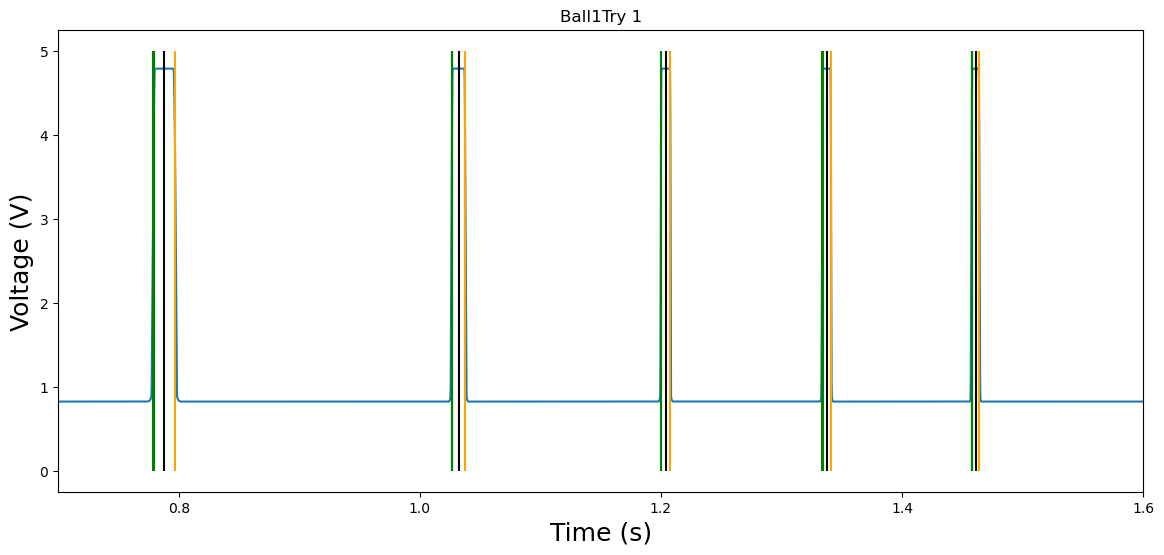

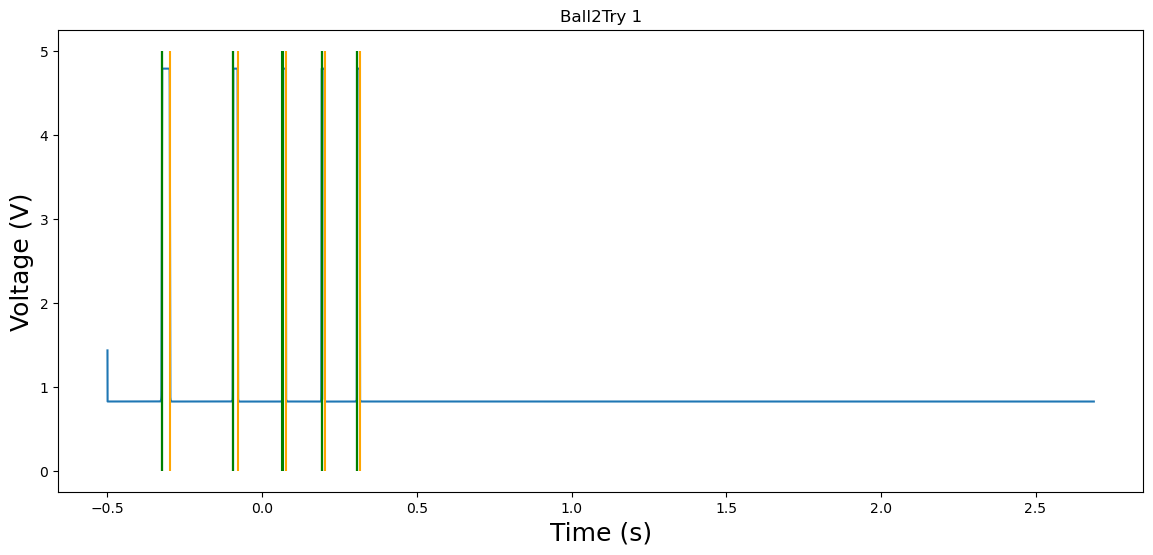

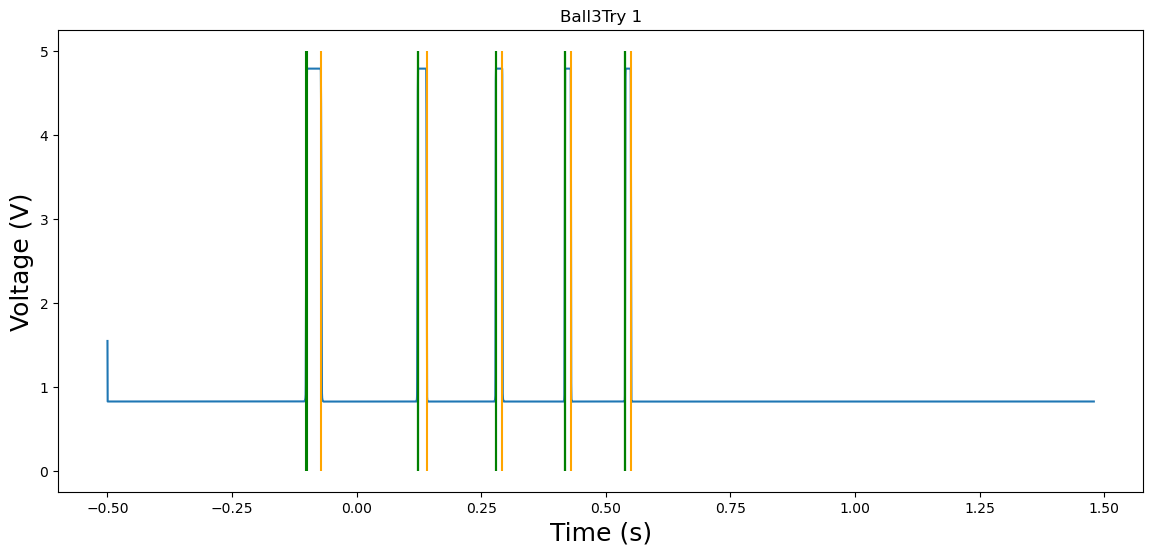

In [198]:
for i in [1,2,3]:
    for j in [1]:
        time, voltage = read_csv('data/ball' + str(i) + '_try' + str(j) + '.csv')
        timepass, timeend, timepass_sig = find_midpoints(time, voltage)
        #'balltry' + str(i)+str(j) == timepass
        fig, ax = plt.subplots(figsize=(14, 6))
        ax.plot(time, voltage, label='Measurements')
        ax.vlines(x = timepass, ymin = 0, ymax = 5, color = "green")
        ax.vlines(x = timeend, ymin = 0, ymax = 5, color = "orange")
        ax.set_title("Ball" + str(i) + "Try " + str(j))
        ax.set_xlabel("Time (s)", fontsize=18)
        ax.set_ylabel("Voltage (V)", fontsize=18)
        print("for ball " + str(i) + "try " + str(j) +  str(timepass))
        if i == 1 and j ==1:
            times_ball1_try1 = timepass
            times_ball1_end1 = timeend
            time1 = get_times(times_ball1_try1)
            end1 = get_times(time_ball1_end1)
            middle1 = find_true_middle(time1,end1)
            ax.vlines(x = middle1, ymin = 0, ymax = 5, color = "black")
            ax.set_xlim(0.7, 1.6)

        if i == 1 and j ==2:
            times_ball1_try2 = timepass
            times_ball1_end2 = timeend
        if i == 1 and j ==3:
            times_ball1_try3 = timepass
            times_ball1_end3 = timeend


In [199]:
#other data

#position of the gates

s_gates = [80.95, 65.15, 50.30, 35.05, 20.15]
mc_gates = [80.8, 65.15, 50.35, 35.05, 20.15]
mg_gates = [81.5, 65.33, 50.45, 35.25, 20.3]

s_gates = np.flip(s_gates)
mc_gates = np.flip(mc_gates)
mg_gates = np.flip(mg_gates)

average_gate = np.zeros_like(s_gates)

for i in range(0,5):
    average_gate[i] = (s_gates[i] + mc_gates[i] + mg_gates[i])/3

def calc_distance_gate(measurements):
    distances = []
    for i in range(0,4):
        d = measurements[i+1] - measurements[i] 
        distances.append(d)
    return distances

distances_s = calc_distance_gate(s_gates)
distances_mc = calc_distance_gate(mc_gates)
distances_mg = calc_distance_gate(mg_gates)

distances_average = np.zeros_like(distances_s)
for i in range(0,4):
    distances_average[i] = (distances_s[i] + distances_mc[i] + distances_mg[i])/3

print(distances_average)
#angles

angle_table = 90.1

goni_mg1 = 14
goni_mc1 = 14
goni_s1 = 14

goni_mg2 = 13.9
goni_mc2 = 13.9
goni_s2 = 13.9

#trigonometry in cm

op_mg = 22.2
op_mc = 21.8
op_s = 22.15

op_err = 0.05

ad_mg = 89.75
ad_mc = 89.1
ad_s = 89.75

ad_err = 0.05

def trig_error(a,b, deltaa, deltab):
    error = math.degrees(abs(1 / b / (a ** 2 / b ** 2 + 1)) * deltaa + abs(-(a / b ** 2 / (a ** 2 / b ** 2 + 1))) * deltab)
    return error

trig_mg =math.degrees(np.arctan((op_mg/ad_mg)))
trig_mg_err = trig_error(op_mg, ad_mg, op_err, ad_err)
print(trig_mg)
print(trig_mg_err)
trig_mc =math.degrees(np.arctan((op_mc/ad_mc)))
trig_mc_err = trig_error(op_mc, ad_mc, op_err, ad_err)
print(trig_mc)
print(trig_mc_err)
trig_s =math.degrees(np.arctan((op_s/ad_s)))
trig_s_err = trig_error(op_s, ad_s, op_err, ad_err)
print(trig_s)
print(trig_s_err)

trig_ave = (trig_mc + trig_mg + trig_s)/3
trig_ave_err = (trig_mc_err + trig_mg_err + trig_s_err)/3
print("the average angle from trigonometry is " + str(trig_ave) + "with an error of " + str(trig_ave_err) + ".")

#diameter of balls in mm

diameter_s = 10, 15, 19
diameter_mc = 9.9, 14.9, 18.9
diameter_mg = 10, 15, 19
D_ball1 = 0.01
D_ball2 = 0.015
D_ball3 = 0.019

err_diamter = 0.1/1000
#railwidth in mm
railwidth = 0.06

error_rail = 0.5/1000

[14.91666667 15.25       14.84333333 15.87333333]
13.893455225920261
0.037519511461961384
13.748403528080555
0.03775887918422657
13.86337203542067
0.037512485701929756
the average angle from trigonometry is 13.835076929807164with an error of 0.03759695878270591.


In [200]:
a = distances_average
b = np.insert(a,0,0, axis = 0)
print(b)

[ 0.         14.91666667 15.25       14.84333333 15.87333333]


In [205]:
def constant_fit(data, error):
    value = sum(data/error**2)*1/sum(1/error**2)
    val_error = 1/sum(1/error**2)
    return value, val_error




# making a 3x5 array out of the data
distance_blocked = np.block([[distances_mg], [distances_mc], [distances_s]])


x_mean = []
x_errors = []
error = 0.05/100

# calculating the mean (using chi2 constant fit although regular mean would work cause all uncertainties are the same)
for col in distance_blocked.T:
    val, err = constant_fit(col, error*np.ones_like(col))
    x_mean.append(val)
    x_errors.append(err)
# array with mean positions
x_mean = np.array(x_mean)
# array with uncertainties of the mean positions
x_errors = np.array(x_errors)

def quadratic_function(t, a, b, c):
    return 0.5*a*t**2+b*t+c

def quadratic_chi2(times, positions, error):
    """
    Returns chi2 to minimize that is only dependent on the fit parameters
    """
    def chi2_parameters(a, b, c):
        chi2_val = sum((positions - quadratic_function(times, a, b, c))**2/error**2)
        return chi2_val
    return chi2_parameters

def quadratic_fit_minimizator(times, positions, error):
    '''
    Minimizes the quadratic chi2
    '''
    m = Minuit(quadratic_chi2(times, positions, error), a=0.1, b=0, c=0)
    m.migrad();
    # print(m.values[0:])
    # print(m.errors[0:])
    return m.values[0:], m.errors[0:]
# Extracting fit parameters

def position_vs_time_with_fit(edge_times_mean, x_mean, x_errors, precision=7, flipped=False):


    pars1, errs1 = quadratic_fit_minimizator(edge_times_mean, x_mean, x_errors)


    domain = np.linspace(0, 0.7, 1000)
    vals1 = quadratic_function(domain, pars1[0], pars1[1], pars1[2])
    plt.plot(figsize=(15, 5))
    if flipped:
        fig.suptitle('Acceleration measurements for flipped incline')
    else:
        fig.suptitle('Acceleration measurements')
    plt.plot(domain, vals1)
    plt.scatter(edge_times_mean, x_mean, color='c')
    plt.errorbar(edge_times_mean, x_mean, yerr=x_errors, fmt='none', ecolor='red', capsize=2)
    plt.title(f'Ball 1\na = {pars1[0]:.{precision}f}, error = {errs1[0]:.{precision}f}')

    plt.tight_layout()
    plt.show()


position_vs_time_with_fit(middle_ball1_try1, x_mean, x_errors )

#position_vs_time_with_fit(av_Midpoint, x_mean, x_errors, flipped=True)


ValueError: operands could not be broadcast together with shapes (4,3) (5,) 

In [202]:
def acceleration_computoinator(edge_times_mean, x_mean, x_errors):
    pars1, errs1 = quadratic_fit_minimizator(edge_times_mean, x_mean, x_errors)
    a1 = pars1[0]
    u_a1 = errs1[0]

    return a1, u_a1


a1, u_a1 = acceleration_computoinator(av_ball1, x_mean, x_errors)
a2, u_a2 = acceleration_computoinator(av_ball2, x_mean, x_errors)
a3, u_a3 = acceleration_computoinator(av_ball3, x_mean, x_errors)
#a1_f, u_a1_f, a2_f, u_a2_f, a3_f, u_a3_f = acceleration_computoinator(edge_times_mean_f, x_mean, x_errors)

print(a1)
print(a2)
print(a3)

ValueError: operands could not be broadcast together with shapes (4,3) (5,) 

In [174]:
def calc_g(a, theta, D_ball, d_rail):
    g = (a)/(np.sin(theta - 0.1))*(1 + 2/5 * D_ball**2/(D_ball**2 - d_rail**2))
    return g

In [178]:
calc_g(1.32, 13.9*np.pi/180, D_ball1, railwidth)

9.181909776610002

In [135]:
def calc_error_g(a, theta, D_ball, d_rail, delt_a, delta_theta, delta_D_ball, delta_d_rail):
    delta_g = delt_a *1/np.sin(theta)*(1 + 2/5 + (D_ball**2)/(D_ball**2 - d_rail**2))#..
    return delta_g

In [136]:
np.sin(0.1)

0.09983341664682815